In [1]:
from features.explainability.monkey_patching import patch_shap, patch_lime, patch_sklearn_inspection, patch_alibi, \
    patch_dale, patch_dalex
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # Some tensorflow warnings in the pipeline we inspect
from mlinspect.utils import get_project_root

from mlinspect import PipelineInspector

EXAMPLE_PIPELINE = os.path.join(str(get_project_root()), "features", "explainability", "examples", "lime", "pipeline.py")

inspector_result = PipelineInspector\
    .on_pipeline_from_py_file(EXAMPLE_PIPELINE) \
    .add_custom_monkey_patching_module(patch_lime) \
    .execute()

extracted_dag = inspector_result.dag
dag_node_to_inspection_results = inspector_result.dag_node_to_inspection_results
check_results = inspector_result.check_to_check_results

Mean accuracy: 0.8767123287671232


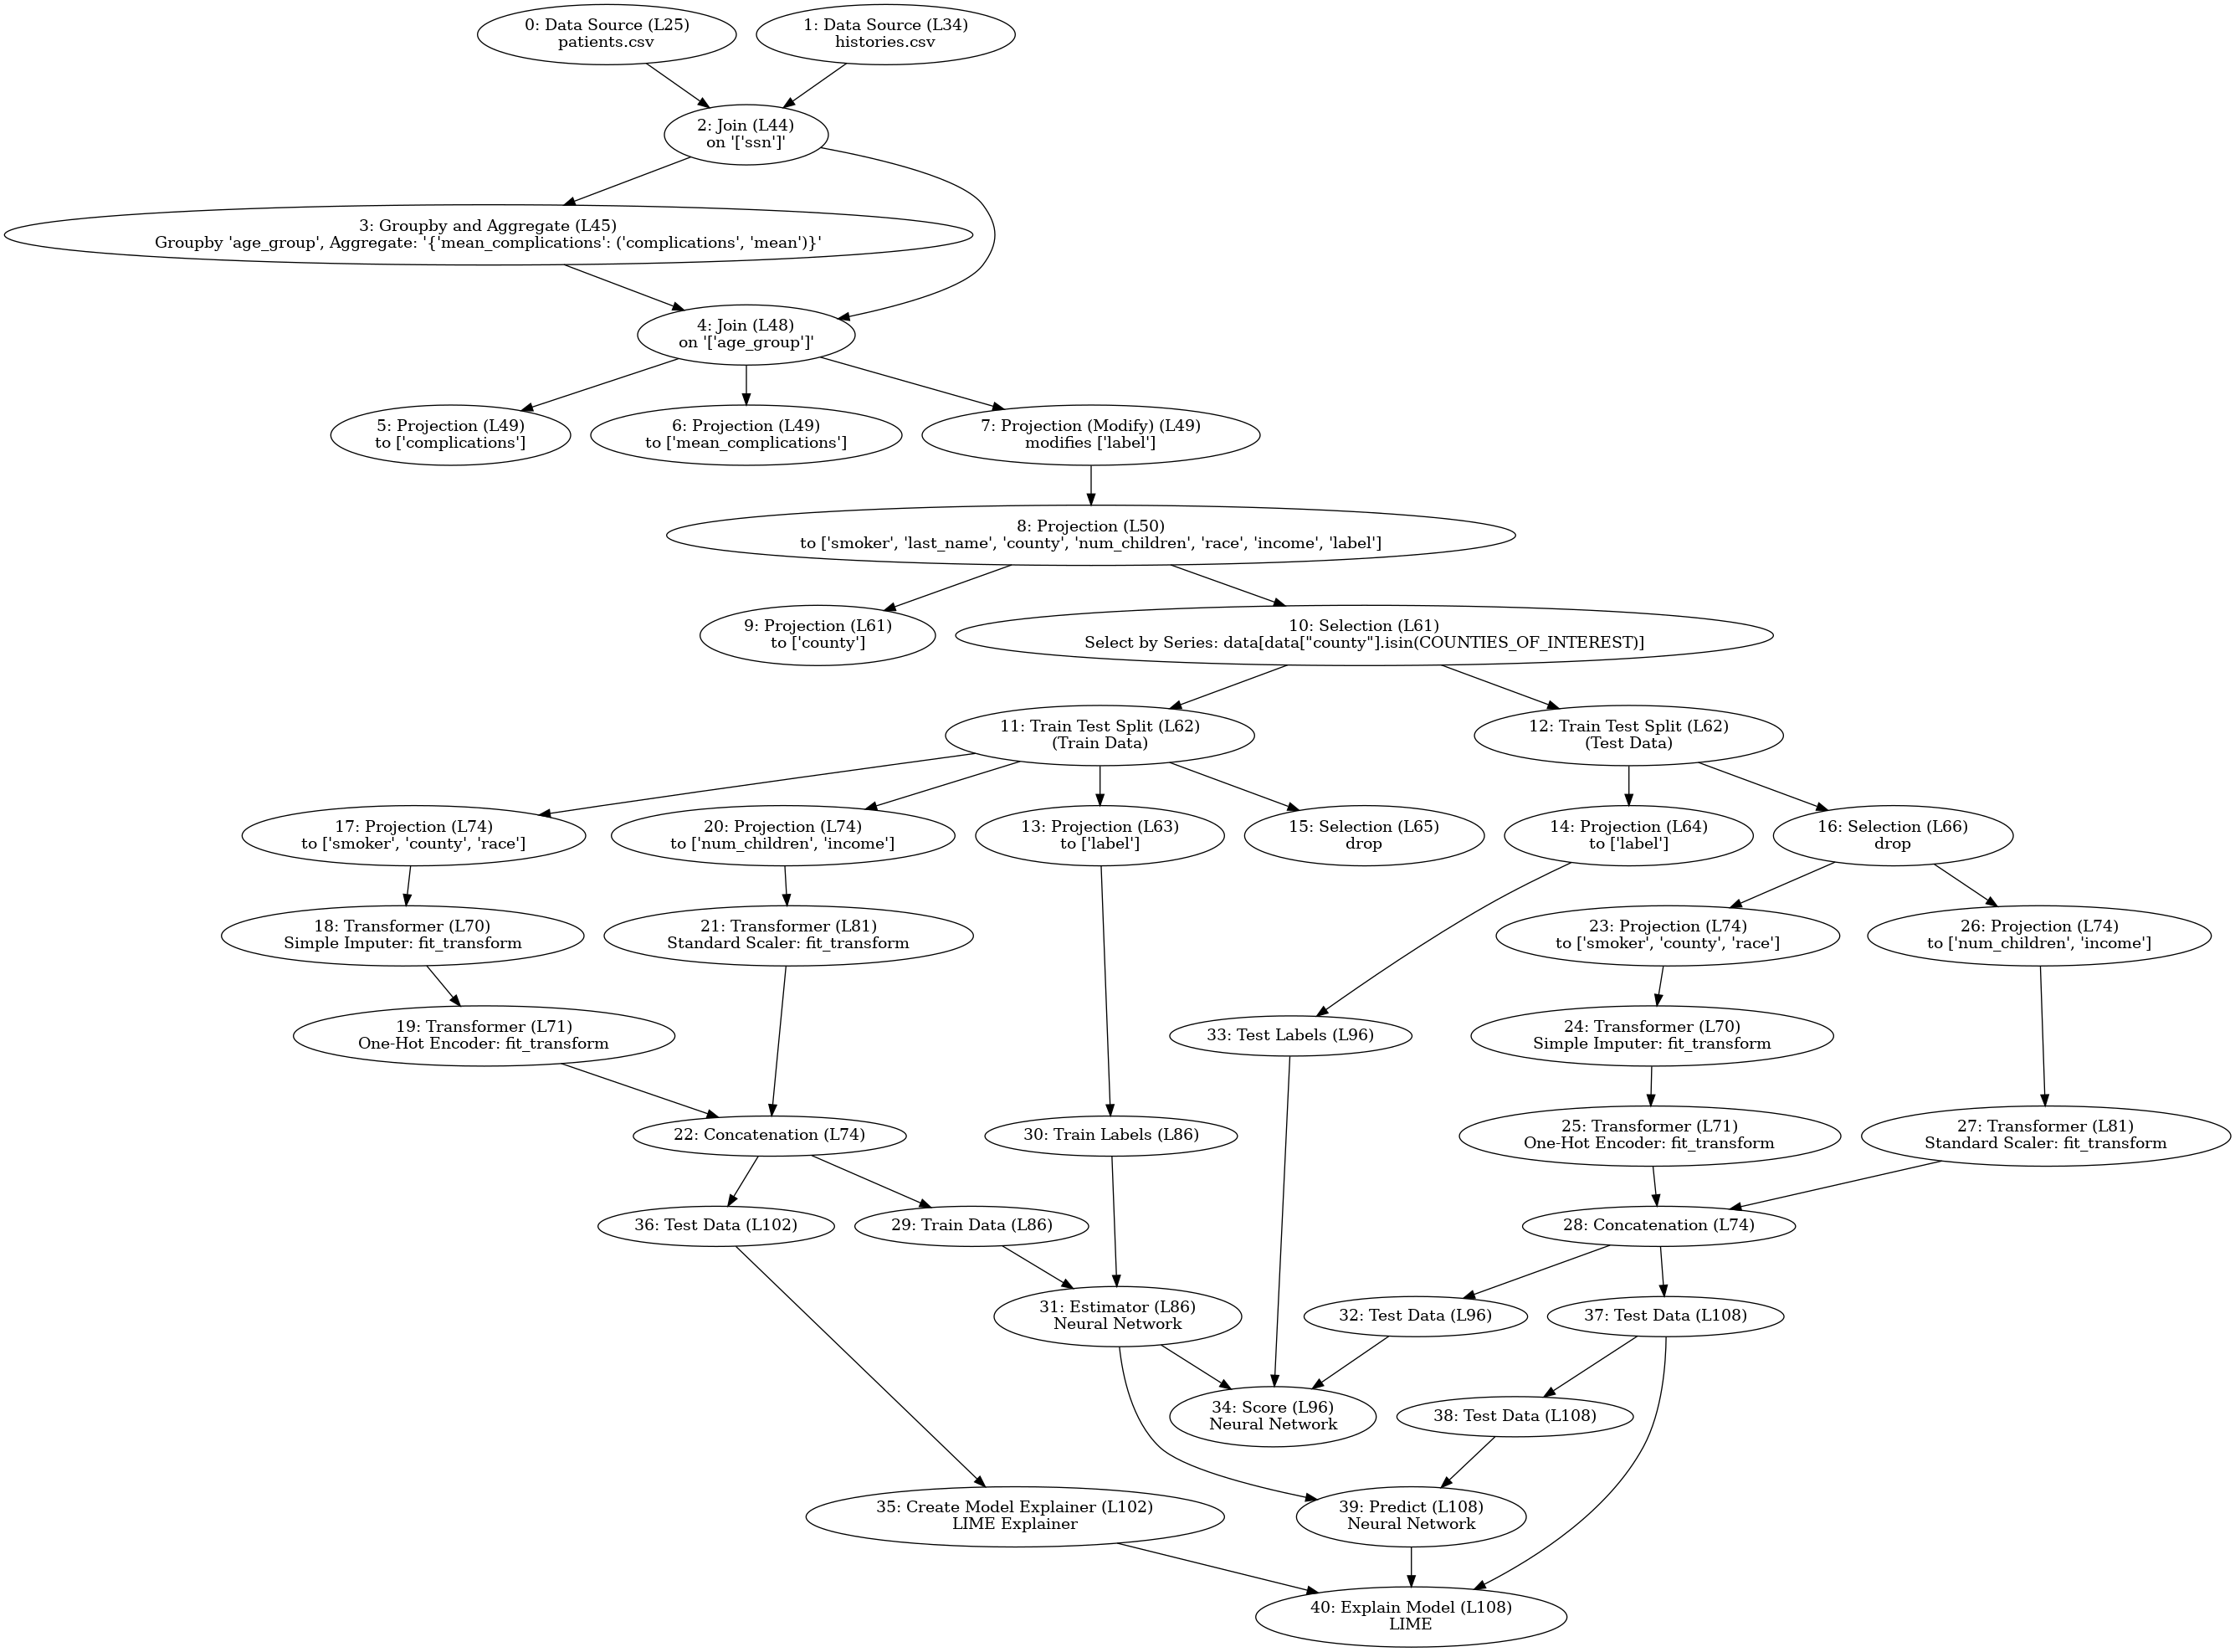

In [2]:
from IPython.display import Image
from mlinspect.visualisation import save_fig_to_path

filename = os.path.join(str(get_project_root()), "features", "explainability", "examples", "lime", "dag.png")
save_fig_to_path(extracted_dag, filename)

Image(filename=filename)